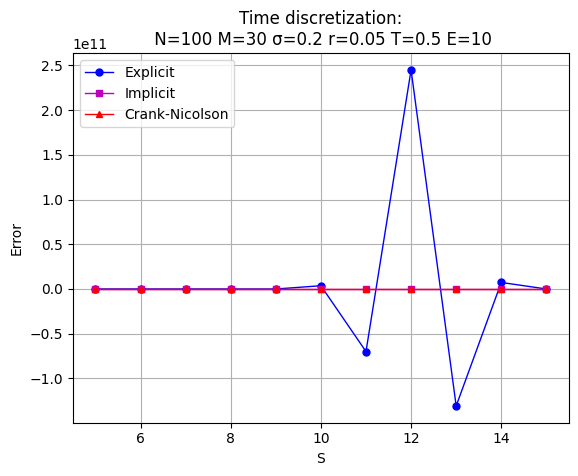

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the Black-Scholes formula for a European put option
def black_scholes_put(S, E, T, r, sigma):
    d1 = (np.log(S / E) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = E * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Explicit Finite Difference Method
def explicit_fd(S, E, T, r, sigma, Smax, M, N):
    dt = T / M
    dS = Smax / N
    S_grid = np.linspace(0, Smax, N + 1)
    V = np.maximum(E - S_grid, 0)  # Terminal condition at t = T

    # Coefficients for Explicit Method
    alpha = 0.5 * dt * ((sigma ** 2) * (np.arange(1, N) ** 2) - r * np.arange(1, N))
    beta = 1 - dt * ((sigma ** 2) * (np.arange(1, N) ** 2) + r)
    gamma = 0.5 * dt * ((sigma ** 2) * (np.arange(1, N) ** 2) + r * np.arange(1, N))
    
    for j in range(M):
        V[1:N] = alpha * V[:N-1] + beta * V[1:N] + gamma * V[2:N+1]
        # Apply Boundary Conditions
        V[0] = E * np.exp(-r * dt * (j+1))
        V[-1] = 0

    return np.interp(S, S_grid, V)

# Implicit Finite Difference Method
def implicit_fd(S, E, T, r, sigma, Smax, M, N):
    dt = T / M
    dS = Smax / N
    S_grid = np.linspace(0, Smax, N + 1)
    V = np.maximum(E - S_grid, 0)  # Terminal condition at t = T

    # Coefficients for Implicit Method
    alpha = -0.5 * dt * ((sigma ** 2) * (np.arange(1, N) ** 2) - r * np.arange(1, N))
    beta = 1 + dt * ((sigma ** 2) * (np.arange(1, N) ** 2) + r)
    gamma = -0.5 * dt * ((sigma ** 2) * (np.arange(1, N) ** 2) + r * np.arange(1, N))
    
    A = np.diag(alpha[1:], -1) + np.diag(beta) + np.diag(gamma[:-1], 1)

    for j in range(M):
        V[1:N] = np.linalg.solve(A, V[1:N])
        # Apply Boundary Conditions
        V[0] = E * np.exp(-r * dt * (j+1))
        V[-1] = 0

    return np.interp(S, S_grid, V)

# Crank-Nicolson Finite Difference Method
def crank_nicolson_fd(S, E, T, r, sigma, Smax, M, N):
    dt = T / M
    dS = Smax / N
    S_grid = np.linspace(0, Smax, N + 1)
    V = np.maximum(E - S_grid, 0)  # Terminal condition at t = T

    # Coefficients for Crank-Nicolson Method
    alpha = -0.25 * dt * ((sigma ** 2) * (np.arange(1, N) ** 2) - r * np.arange(1, N))
    beta = 1 + 0.5 * dt * ((sigma ** 2) * (np.arange(1, N) ** 2) + r)
    gamma = -0.25 * dt * ((sigma ** 2) * (np.arange(1, N) ** 2) + r * np.arange(1, N))

    A = np.diag(alpha[1:], -1) + np.diag(beta) + np.diag(gamma[:-1], 1)
    B = np.diag(-alpha[1:], -1) + np.diag(2 - beta) + np.diag(-gamma[:-1], 1)

    for j in range(M):
        V[1:N] = np.linalg.solve(A, np.dot(B, V[1:N]))
        # Apply Boundary Conditions
        V[0] = E * np.exp(-r * dt * (j+1))
        V[-1] = 0

    return np.interp(S, S_grid, V)

# Parameters
E = 10            # Strike price
r = 0.05          # Risk-free rate
T = 0.5           # Time to maturity
sigma = 0.2       # Volatility
Smax = 20         # Maximum stock price considered
S_values = np.arange(5, 16, 1)  # Stock price range S = {5, 6, ..., 15}

# Specified values for N and M
N = 100
M = 30

# Lists to store errors
errors_explicit = []
errors_implicit = []
errors_crank = []

# Calculating errors for different methods
for S in S_values:
    bs_price = black_scholes_put(S, E, T, r, sigma)
    price_explicit = explicit_fd(S, E, T, r, sigma, Smax, M, N)
    price_implicit = implicit_fd(S, E, T, r, sigma, Smax, M, N)
    price_crank = crank_nicolson_fd(S, E, T, r, sigma, Smax, M, N)
    
    errors_explicit.append(bs_price - price_explicit)
    errors_implicit.append(bs_price - price_implicit)
    errors_crank.append(bs_price - price_crank)

# Plotting Error Comparisons
plt.plot(S_values, errors_explicit, 'b-o', label='Explicit', linewidth=1.0, markersize=5)
plt.plot(S_values, errors_implicit, 'm-s', label='Implicit', linewidth=1.0, markersize=5)
plt.plot(S_values, errors_crank, 'r-^', label='Crank-Nicolson', linewidth=1.0, markersize=5)
plt.title('Time discretization:\n N=100 M=30 σ=0.2 r=0.05 T=0.5 E=10')
plt.xlabel('S')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

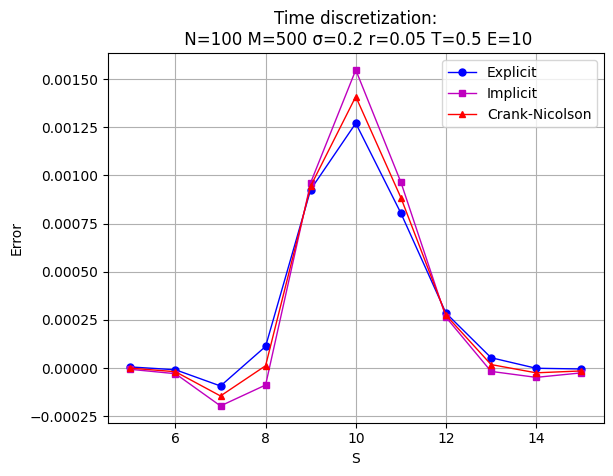

In [2]:
# Specified values for N and updated M
N = 100
M = 500  # Increased number of time steps

# Lists to store errors for new M
errors_explicit_M500 = []
errors_implicit_M500 = []
errors_crank_M500 = []

# Calculating errors for different methods with new M
for S in S_values:
    bs_price = black_scholes_put(S, E, T, r, sigma)
    price_explicit = explicit_fd(S, E, T, r, sigma, Smax, M, N)
    price_implicit = implicit_fd(S, E, T, r, sigma, Smax, M, N)
    price_crank = crank_nicolson_fd(S, E, T, r, sigma, Smax, M, N)
    
    errors_explicit_M500.append(bs_price - price_explicit)
    errors_implicit_M500.append(bs_price - price_implicit)
    errors_crank_M500.append(bs_price - price_crank)

# Plotting Error Comparisons for M = 500
plt.plot(S_values, errors_explicit_M500, 'b-o', label='Explicit', linewidth=1.0, markersize=5)
plt.plot(S_values, errors_implicit_M500, 'm-s', label='Implicit', linewidth=1.0, markersize=5)
plt.plot(S_values, errors_crank_M500, 'r-^', label='Crank-Nicolson', linewidth=1.0, markersize=5)
plt.title('Time discretization:\n N=100 M=500 σ=0.2 r=0.05 T=0.5 E=10')
plt.xlabel('S')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

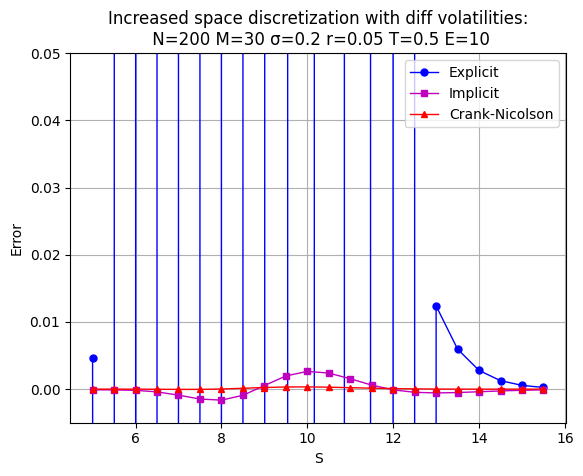

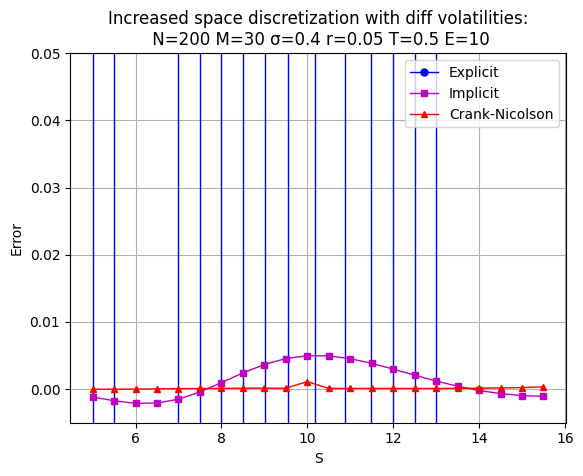

In [4]:
# Define parameters
E = 10            # Strike price
r = 0.05          # Risk-free rate
T = 0.5           # Time to maturity
Smax = 20         # Maximum stock price considered
S_values = np.arange(5, 16, 0.5)  # Stock price range S = {5, 6, ..., 15}
N = 200           # Number of space steps
M = 30            # Number of time steps

# Different volatilities
sigma_values = [0.2, 0.4]

# Loop through both volatilities
for sigma in sigma_values:
    errors_explicit = []
    errors_implicit = []
    errors_crank = []
    
    for S in S_values:
        bs_price = black_scholes_put(S, E, T, r, sigma)
        price_explicit = explicit_fd(S, E, T, r, sigma, Smax, M, N)
        price_implicit = implicit_fd(S, E, T, r, sigma, Smax, M, N)
        price_crank = crank_nicolson_fd(S, E, T, r, sigma, Smax, M, N)
        
        errors_explicit.append(bs_price - price_explicit)
        errors_implicit.append(bs_price - price_implicit)
        errors_crank.append(bs_price - price_crank)
    
    # Plotting the errors for each volatility
    plt.plot(S_values, errors_explicit, 'b-o', label='Explicit', linewidth=1.0, markersize=5)
    plt.plot(S_values, errors_implicit, 'm-s', label='Implicit', linewidth=1.0, markersize=5)
    plt.plot(S_values, errors_crank, 'r-^', label='Crank-Nicolson', linewidth=1.0, markersize=5)
    plt.title(f'Increased space discretization with diff volatilities:\n N=200 M=30 σ={sigma} r=0.05 T=0.5 E=10')
    plt.xlabel('S')
    plt.ylabel('Error')
    plt.ylim(-0.005, 0.05)
    plt.legend()
    plt.grid(True)
    plt.show()

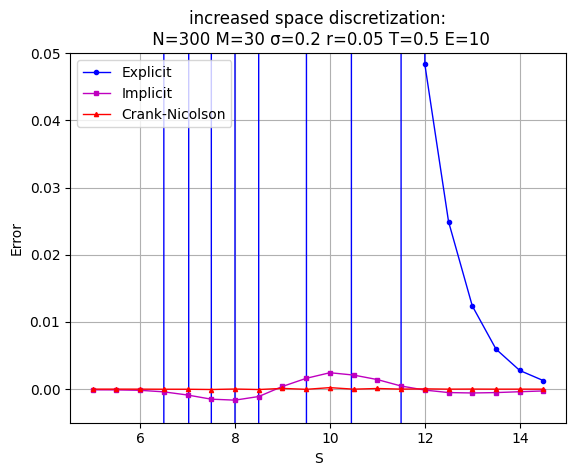

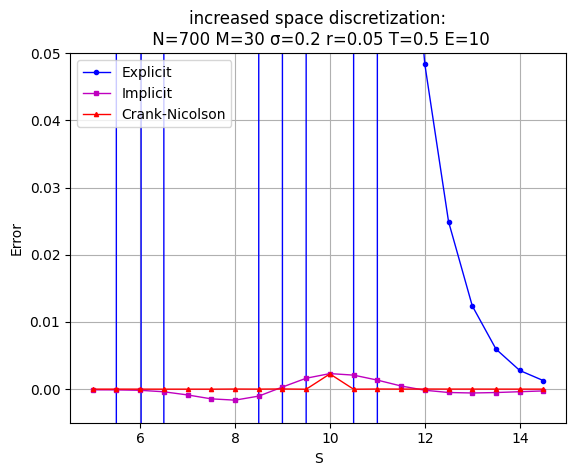

In [6]:
# Define Parameters
E = 10            # Strike price
r = 0.05          # Risk-free rate
T = 0.5           # Time to maturity
sigma = 0.2       # Volatility
Smax = 20         # Maximum stock price considered
S_values = np.arange(5, 15, 0.5)  # Stock price range S = {5, 5.5, ..., 15}
M = 30            # Number of time steps

# Loop over different values of N
N_values = [300, 700]

for N in N_values:
    errors_explicit = []
    errors_implicit = []
    errors_crank = []
    
    for S in S_values:
        bs_price = black_scholes_put(S, E, T, r, sigma)
        price_explicit = explicit_fd(S, E, T, r, sigma, Smax, M, N)
        price_implicit = implicit_fd(S, E, T, r, sigma, Smax, M, N)
        price_crank = crank_nicolson_fd(S, E, T, r, sigma, Smax, M, N)
        
        errors_explicit.append(bs_price - price_explicit)
        errors_implicit.append(bs_price - price_implicit)
        errors_crank.append(bs_price - price_crank)
    
    # Plot Errors
    plt.plot(S_values, errors_explicit, 'b-o', label='Explicit', linewidth=1.0, markersize=3)
    plt.plot(S_values, errors_implicit, 'm-s', label='Implicit', linewidth=1.0, markersize=3)
    plt.plot(S_values, errors_crank, 'r-^', label='Crank-Nicolson', linewidth=1.0, markersize=3)
    plt.title(f'increased space discretization:\n N={N} M={M} σ={sigma} r=0.05 T=0.5 E=10')
    plt.xlabel('S')
    plt.ylabel('Error')
    plt.ylim(-0.005, 0.05)  # Adjust y-axis range for visibility
    plt.legend()
    plt.grid(True)
    plt.show()

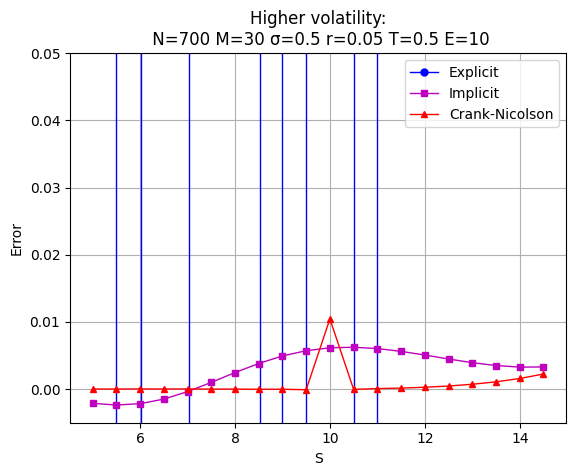

In [11]:
# Parameters
E = 10            # Strike price
r = 0.05          # Risk-free rate
T = 0.5           # Time to maturity
sigma = 0.5       # Volatility
Smax = 20         # Maximum stock price considered
S_values = np.arange(5, 15, 0.5)  # Stock price range S = {5, 5.5, ..., 15}

# Specified values for N and M
N = 700
M = 30

# Lists to store errors
errors_explicit = []
errors_implicit = []
errors_crank = []

# Calculating errors for different methods
for S in S_values:
    bs_price = black_scholes_put(S, E, T, r, sigma)
    price_explicit = explicit_fd(S, E, T, r, sigma, Smax, M, N)
    price_implicit = implicit_fd(S, E, T, r, sigma, Smax, M, N)
    price_crank = crank_nicolson_fd(S, E, T, r, sigma, Smax, M, N)
    
    errors_explicit.append(bs_price - price_explicit)
    errors_implicit.append(bs_price - price_implicit)
    errors_crank.append(bs_price - price_crank)

# Plotting Error Comparisons
plt.plot(S_values, errors_explicit, 'b-o', label='Explicit', linewidth=1.0, markersize=5)
plt.plot(S_values, errors_implicit, 'm-s', label='Implicit', linewidth=1.0, markersize=5)
plt.plot(S_values, errors_crank, 'r-^', label='Crank-Nicolson', linewidth=1.0, markersize=5)
plt.title('Higher volatility:\n N=700 M=30 σ=0.5 r=0.05 T=0.5 E=10')
plt.ylim(-0.005, 0.05)  # Adjust y-axis range for visibility
plt.xlabel('S')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()